# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | port saint john's
Processing Record 3 of Set 1 | ust'-kulom
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | gorzyce
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | fort bragg
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | kelibia
Processing Record 11 of Set 1 | saguenay
Processing Record 12 of Set 1 | grand falls-windsor
Processing Record 13 of Set 1 | forster
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | columbia
Processing Record 16 of Set 1 | egilsstadir
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | ebon
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | ardesen
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | grytviken
Pro

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,293.58,76,100,1.79,PT,1689543428
1,port saint john's,-31.6229,29.5448,289.58,60,20,3.09,ZA,1689543428
2,ust'-kulom,61.6864,53.6902,287.01,71,100,0.27,RU,1689543428
3,port-aux-francais,-49.3500,70.2167,275.05,54,82,10.25,TF,1689543428
4,gorzyce,50.6672,21.8401,293.53,85,7,3.24,PL,1689543429


In [8]:
# Export the City_Data into a csv
# Get the current working directory
current_directory = os.getcwd()

# Create the output_data directory 
output_directory = os.path.join(current_directory, 'output_data')
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Export the City_Data into a CSV in the output_data directory
output_file = os.path.join(output_directory, 'cities.csv')
city_data_df.to_csv(output_file, index_label='City_ID')
print(f'Data exported to {output_file}')

#Note to self: figure out a shorter way to write this code. Should'nt have taken so much research nor needed to import os

Data exported to c:\Users\Isaac Technology\Desktop\Data Analytics Boot Camp\Week 6\Module 6 Challenge files\Starter_Code\starter_code\output_data\cities.csv


In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,293.58,76,100,1.79,PT,1689543428
1,port saint john's,-31.6229,29.5448,289.58,60,20,3.09,ZA,1689543428
2,ust'-kulom,61.6864,53.6902,287.01,71,100,0.27,RU,1689543428
3,port-aux-francais,-49.3500,70.2167,275.05,54,82,10.25,TF,1689543428
4,gorzyce,50.6672,21.8401,293.53,85,7,3.24,PL,1689543429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

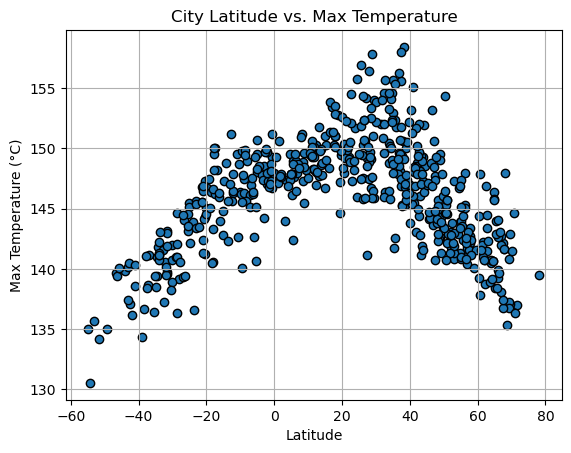

In [10]:
# Build scatter plot for latitude vs. temperature
# Convert temperature from °F to °C
city_data_df["Max Temp (°C)"] = (city_data_df["Max Temp"] - 32) * 5/9

# Build scatter plot for latitude vs. temperature in °C
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (°C)"], edgecolor="black")

# Set plot title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Set plot grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

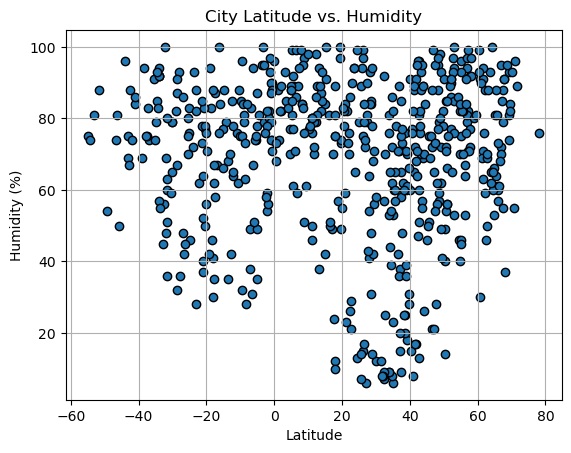

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Set plot title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set plot grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

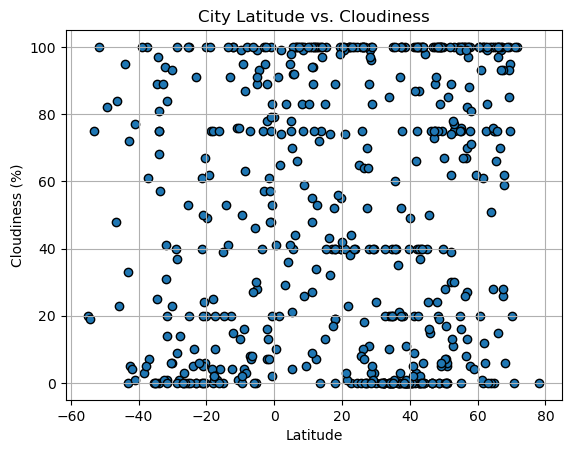

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Set plot title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set plot grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

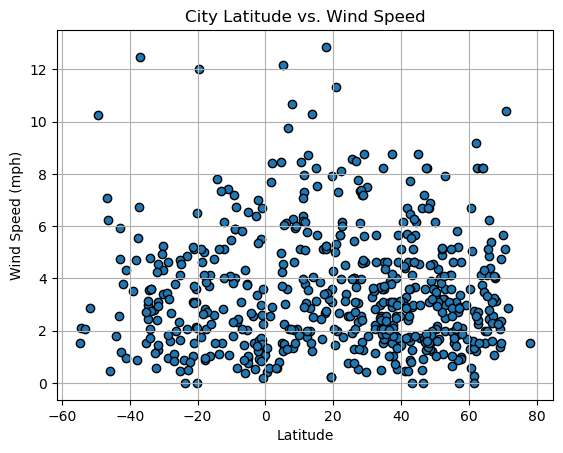

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Set plot title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set plot grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create regression line
    regression_line = slope * x + intercept

    # Build scatter plot
    plt.scatter(x, y, edgecolor="black")

    # Plot regression line
    plt.plot(x, regression_line, color="red")

    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Set plot grid
    plt.grid(True)

    # Show the plot
    plt.show()

In [15]:
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
print("Northern Hemisphere Data:")
print(northern_hemi_df.head())

Northern Hemisphere Data:
                   City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0        ribeira grande  38.5167  -28.7000    293.58        76         100   
2            ust'-kulom  61.6864   53.6902    287.01        71         100   
4               gorzyce  50.6672   21.8401    293.53        85           7   
5                kodiak  57.7900 -152.4072    287.88        72          75   
7            fort bragg  35.1390  -79.0060    307.29        53          20   

         Wind Speed Country        Date  Max Temp (°C)  
City_ID                                                 
0              1.79      PT  1689543428     145.322222  
2              0.27      RU  1689543428     141.672222  
4              3.24      PL  1689543429     145.294444  
5              4.63      US  1689543429     142.155556  
7              4.63      US  1689543429     152.938889  


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0].copy()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (°C)
City_ID,,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,293.58,76,100,1.79,PT,1689543428,145.322222
2,ust'-kulom,61.6864,53.6902,287.01,71,100,0.27,RU,1689543428,141.672222
4,gorzyce,50.6672,21.8401,293.53,85,7,3.24,PL,1689543429,145.294444
5,kodiak,57.7900,-152.4072,287.88,72,75,4.63,US,1689543429,142.155556
7,fort bragg,35.1390,-79.0060,307.29,53,20,4.63,US,1689543429,152.938889


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (°C)
City_ID,,,,,,,,,,
1,port saint john's,-31.6229,29.5448,289.58,60,20,3.09,ZA,1689543428,143.100000
3,port-aux-francais,-49.3500,70.2167,275.05,54,82,10.25,TF,1689543428,135.027778
6,ushuaia,-54.8000,-68.3000,274.96,75,20,1.54,AR,1689543429,134.977778
8,papatowai,-46.5619,169.4708,283.44,74,48,7.06,NZ,1689543429,139.688889
12,forster,-32.1667,152.5167,284.98,100,94,0.57,AU,1689543430,140.544444


###  Temperature vs. Latitude Linear Regression Plot

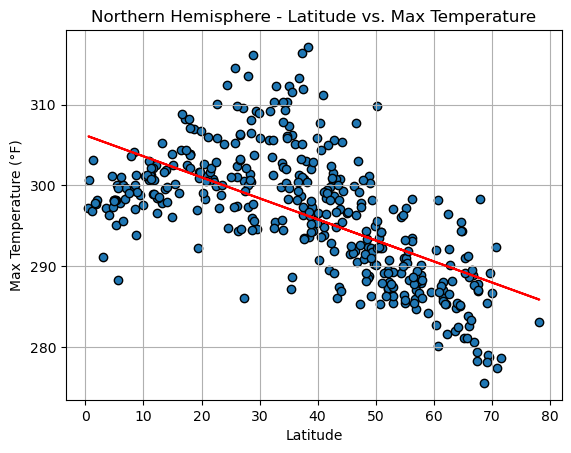

In [18]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Create regression line
regression_line = slope * northern_hemi_df["Lat"] + intercept

# Build scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolor="black")

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regression_line, color="red")

# Set plot title and labels
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Set plot grid
plt.grid(True)

# Show the plot
plt.show()

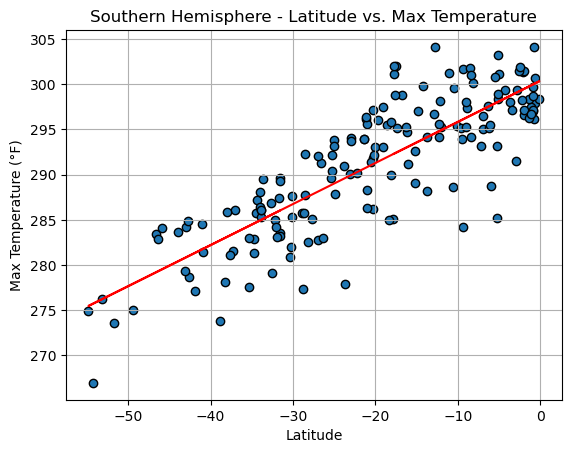

In [19]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Create regression line
regression_line = slope * southern_hemi_df["Lat"] + intercept

# Build scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolor="black")

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regression_line, color="red")

# Set plot title and labels
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Set plot grid
plt.grid(True)

# Show the plot
plt.show()

**Discussion about the linear relationship:** The linear regression plots for both the Northern Hemisphere and Southern Hemisphere provide insights into the relationship between latitude and maximum temperature. In the Northern Hemisphere, a negative slope suggests that as latitude increases, maximum temperature tends to decrease, while a positive slope indicates an increase in maximum temperature with increasing latitude. Similarly, in the Southern Hemisphere, a negative slope indicates a decrease in maximum temperature as latitude decreases, and a positive slope suggests an increase in maximum temperature with decreasing latitude. The closer the data points align with the regression line, the stronger the linear relationship. These observations allow us to understand how latitude influences maximum temperature in different hemispheres, although it is important to consider other factors that may influence temperature.

### Humidity vs. Latitude Linear Regression Plot

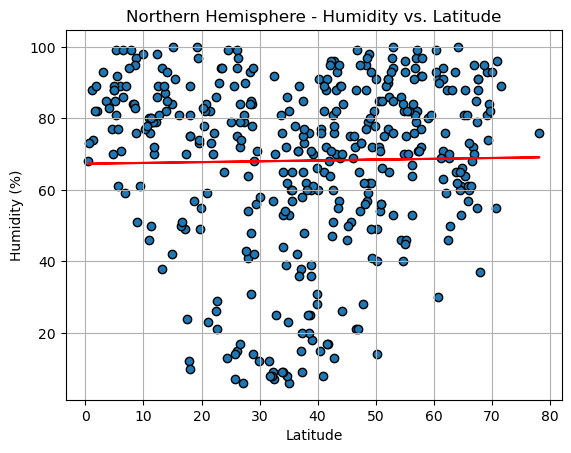

In [26]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude")

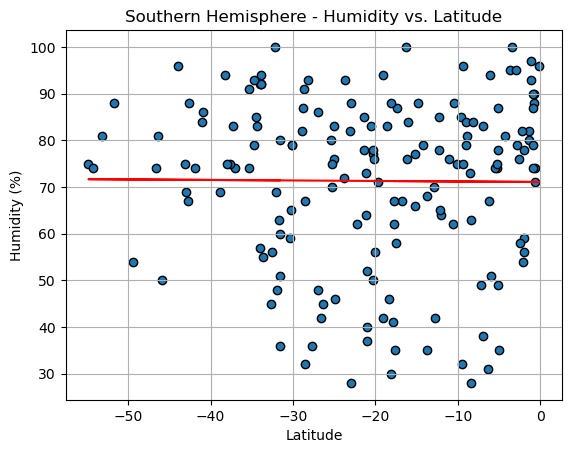

In [27]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude")

**Discussion about the linear relationship:** The linear regression plots for humidity vs. latitude in both the Northern Hemisphere and Southern Hemisphere provide insights into the relationship between these variables. In the Northern Hemisphere, a positive slope suggests that as latitude increases, humidity tends to increase, while a negative slope indicates a decrease in humidity with increasing latitude. Similarly, in the Southern Hemisphere, a positive slope indicates an increase in humidity as latitude decreases, while a negative slope suggests a decrease in humidity. The strength of the linear relationship is determined by the proximity of data points to the regression line, with a higher coefficient of determination indicating a stronger correlation. It's important to consider other factors that influence humidity, but these plots provide a simplified understanding of the relationship between latitude and humidity in different hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

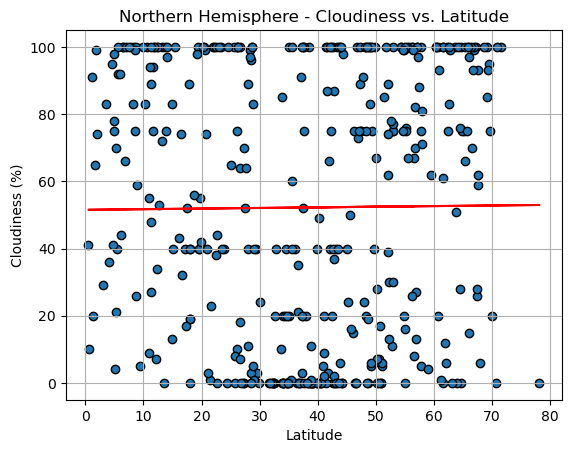

In [28]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude")

In [30]:
# Southern Hemisphere
# create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude")

**Discussion about the linear relationship:**  The linear regression plots for cloudiness vs. latitude in both the Northern Hemisphere and Southern Hemisphere provide insights into the relationship between these variables. In the Northern Hemisphere, cloudiness tends to increase as latitude increases if the slope is positive, and decrease if the slope is negative. In the Southern Hemisphere, cloudiness tends to increase as latitude decreases if the slope is positive, and decrease if the slope is negative. The strength of the relationship is determined by how closely the data points align with the regression line. These plots provide a simplified understanding of the relationship between latitude and cloudiness, considering that other factors can also influence cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

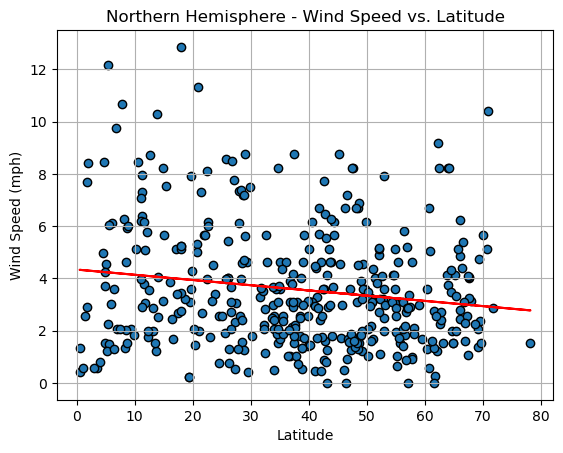

In [31]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude")

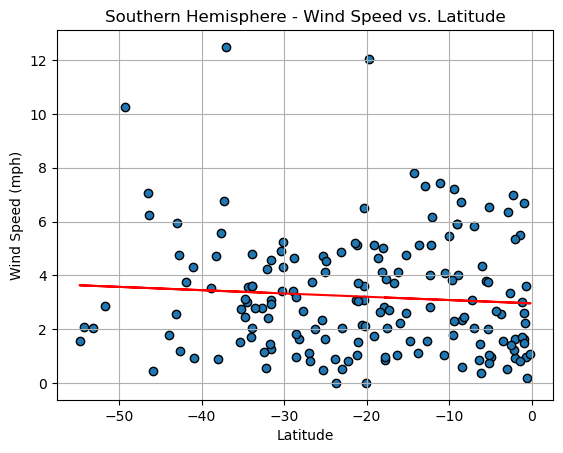

In [32]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude")

**Discussion about the linear relationship:** The linear regression plots for wind speed vs. latitude in both the Northern Hemisphere and Southern Hemisphere provide insights into the relationship between these variables. In the Northern Hemisphere, wind speed tends to increase as latitude increases if the slope is positive, and decrease if the slope is negative. In the Southern Hemisphere, wind speed tends to increase as latitude decreases if the slope is positive, and decrease if the slope is negative. The closeness of the data points to the regression line indicates the strength of the relationship. It's important to consider other factors that influence wind speed, but these plots provide a simplified understanding of the relationship between latitude and wind speed in different hemispheres.